# SVHN

In [1]:
import itertools
import random
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

random_seed = 20181401
random.seed(random_seed)
np.random.seed(random_seed)
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [2]:
total_epochs = 64
batch_size = 32
svhn_train = datasets.SVHN(root="datasets/SVHN/", split="train", transform=transforms.ToTensor(), download=True)
svhn_test = datasets.SVHN(root="datasets/SVHN/", split="test", transform=transforms.ToTensor(), download=True)
svhn_train_loader = DataLoader(svhn_train, batch_size=batch_size, shuffle=True, drop_last=True)
svhn_test_loader = DataLoader(svhn_test, batch_size=batch_size)

print("X:", svhn_train.data.shape)
print("Y:", svhn_train.labels.shape)

Using downloaded and verified file: datasets/SVHN/train_32x32.mat
Using downloaded and verified file: datasets/SVHN/test_32x32.mat
X: (73257, 3, 32, 32)
Y: (73257,)


In [3]:
class SVHNModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Sequential(nn.Linear(3072, 2048), nn.BatchNorm1d(2048), nn.ReLU(), nn.Dropout(0.5))
    self.layer2 = nn.Sequential(nn.Linear(2048, 1024), nn.BatchNorm1d(1024), nn.ReLU(), nn.Dropout(0.5))
    self.layer3 = nn.Sequential(nn.Linear(1024, 512), nn.BatchNorm1d(512), nn.ReLU(), nn.Dropout(0.5))
    self.layer4 = nn.Sequential(nn.Linear(512, 256), nn.BatchNorm1d(256), nn.ReLU(), nn.Dropout(0.5))
    self.layer5 = nn.Sequential(nn.Linear(256, 128), nn.BatchNorm1d(128), nn.ReLU(), nn.Dropout(0.5))
    self.layer6 = nn.Sequential(nn.Linear(128, 10), nn.LogSoftmax(dim=1))
    nn.init.xavier_uniform_(self.layer1[0].weight)
    nn.init.xavier_uniform_(self.layer2[0].weight)
    nn.init.xavier_uniform_(self.layer3[0].weight)
    nn.init.xavier_uniform_(self.layer4[0].weight)
    nn.init.xavier_uniform_(self.layer5[0].weight)
    nn.init.xavier_uniform_(self.layer6[0].weight)

  def forward(self, x):
    return (
      self.layer6(
        self.layer5(
          self.layer4(
            self.layer3(
              self.layer2(
                self.layer1(
                  x
                )
              )
            )
          )
        )
      )
    )

In [4]:
model = SVHNModel().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [5]:
def calculate_accurancy():
  with torch.no_grad():
    model.eval()
    accurancy = 0
    batch_count = len(svhn_test_loader)

    for x, y in svhn_test_loader:
      assert isinstance(x, torch.Tensor)
      assert isinstance(y, torch.Tensor)
      x = x.view(-1, 3072).to(device)
      y = y.to(device)

      hypothesis = model(x)
      prediction = hypothesis.argmax(dim=1)
      correct_prediction = (prediction == y)
      accurancy += correct_prediction.float().mean().item() / batch_count
  
    return accurancy

In [6]:
print("epoch =", 0, "/", "accurancy = {:.3f}%".format(calculate_accurancy() * 100))

for epoch in range(total_epochs):
  model.train()
  avg_cost = 0
  batch_count = len(svhn_train_loader)

  for x, y in svhn_train_loader:
    assert isinstance(x, torch.Tensor)
    assert isinstance(y, torch.Tensor)
    x = x.view(-1, 3072).to(device)
    y = y.to(device)

    hypothesis = model(x)
    cost = nn.functional.nll_loss(hypothesis, y)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    avg_cost += cost.item() / batch_count
  
  print("epoch =", (epoch + 1), "/", "cost =", avg_cost, "/", "accurancy = {:.3f}%".format(calculate_accurancy() * 100))

epoch = 0 / accurancy = 9.555%
epoch = 1 / cost = 2.2531488964056665 / accurancy = 24.117%
epoch = 2 / cost = 1.8717691079660914 / accurancy = 44.595%
epoch = 3 / cost = 1.5009668733991348 / accurancy = 57.924%
epoch = 4 / cost = 1.3330832661994918 / accurancy = 65.483%
epoch = 5 / cost = 1.2104729190045675 / accurancy = 68.378%
epoch = 6 / cost = 1.1329421248171414 / accurancy = 71.403%
epoch = 7 / cost = 1.0695923256686581 / accurancy = 75.230%
epoch = 8 / cost = 1.0132881594360452 / accurancy = 75.042%
epoch = 9 / cost = 0.9712499026233521 / accurancy = 75.273%
epoch = 10 / cost = 0.9344069945885125 / accurancy = 76.363%
epoch = 11 / cost = 0.9121900026638895 / accurancy = 77.177%
epoch = 12 / cost = 0.8888444205906362 / accurancy = 79.023%
epoch = 13 / cost = 0.8646296471708877 / accurancy = 79.361%
epoch = 14 / cost = 0.8514763094767991 / accurancy = 79.695%
epoch = 15 / cost = 0.8412827822176753 / accurancy = 80.129%
epoch = 16 / cost = 0.8189090997462409 / accurancy = 79.607%
ep

Label: 5
Prediction: 5 (31.953%)


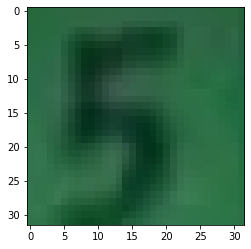

Label: 2
Prediction: 2 (98.443%)


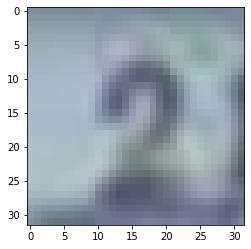

Label: 1
Prediction: 1 (85.599%)


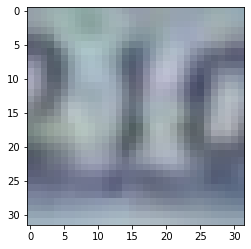

Label: 0
Prediction: 0 (95.047%)


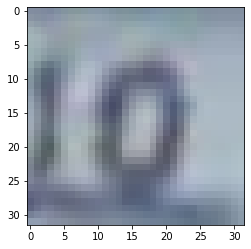

Label: 6
Prediction: 6 (80.687%)


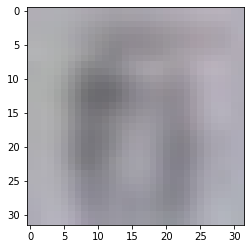

Label: 1
Prediction: 1 (98.712%)


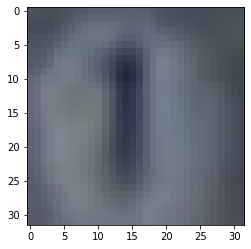

Label: 9
Prediction: 9 (72.230%)


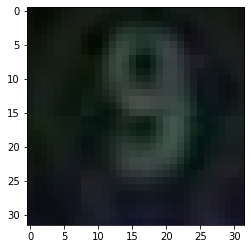

Label: 1
Prediction: 1 (99.917%)


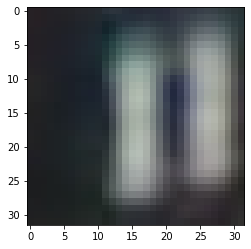

Label: 1
Prediction: 1 (98.860%)


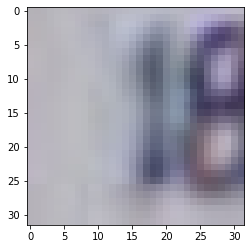

Label: 8
Prediction: 8 (99.741%)


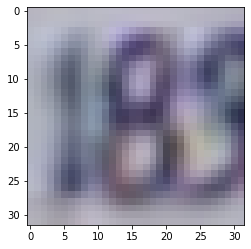

Label: 3
Prediction: 9 (45.945%)


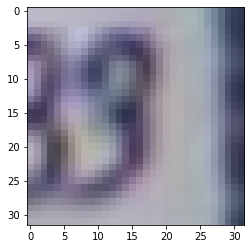

Label: 6
Prediction: 6 (74.193%)


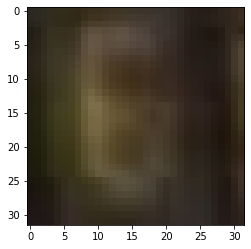

Label: 5
Prediction: 5 (80.241%)


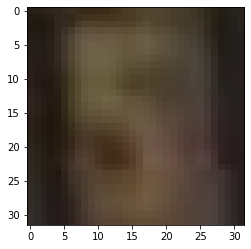

Label: 1
Prediction: 1 (86.591%)


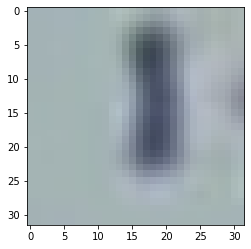

Label: 4
Prediction: 4 (91.191%)


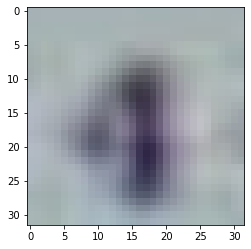

Label: 4
Prediction: 4 (98.054%)


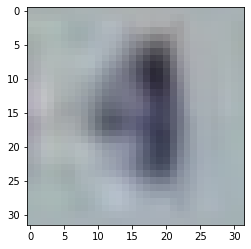

Label: 1
Prediction: 1 (99.691%)


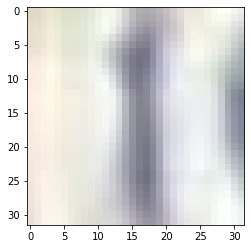

Label: 6
Prediction: 6 (99.134%)


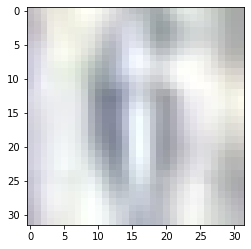

Label: 3
Prediction: 3 (99.737%)


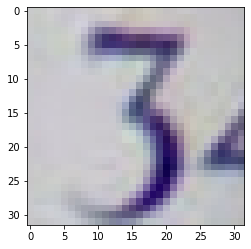

Label: 4
Prediction: 4 (99.997%)


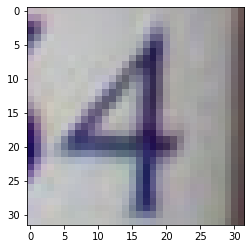

In [7]:
with torch.no_grad():
  model.eval()
  
  for x, y in itertools.islice(DataLoader(svhn_test, batch_size=1), 20):
    assert isinstance(x, torch.Tensor)
    assert isinstance(y, torch.Tensor)
    x = x.view(-1, 3072).to(device)
    y = y.to(device)

    hypothesis = model(x)
    prediction = hypothesis.argmax(dim=1).item()
    prediction_percent = hypothesis.max(dim=1)[0].exp().item() * 100

    print("Label:", y.item())
    print("Prediction:", prediction, "({:.3f}%)".format(prediction_percent))
    plt.imshow(x.cpu().view(3, 32, 32).permute(1, 2, 0))
    plt.show()